In [31]:
# Step 1: Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


data = load_and_preview("creditcard.csv")

# Plot settings
sns.set(style="darkgrid", palette="Set2")
plt.rcParams["figure.figsize"] = (12, 6)
warnings.filterwarnings("ignore")



✅ Dataset Loaded: 284807 records & 31 features



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
# Step 2: Load and Preview the Dataset
def load_and_preview(file_path):
    df = pd.read_csv(file_path)
    print(f"✅ Dataset Loaded: {df.shape[0]} records & {df.shape[1]} features\n")
    display(df.head())
    return df


In [35]:

# Step 3: Descriptive Statistics
def dataset_summary(df):
    print("📊 Descriptive Statistics:")
    display(df.describe().style.background_gradient(cmap="YlGnBu"))

dataset_summary(data)

📊 Descriptive Statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


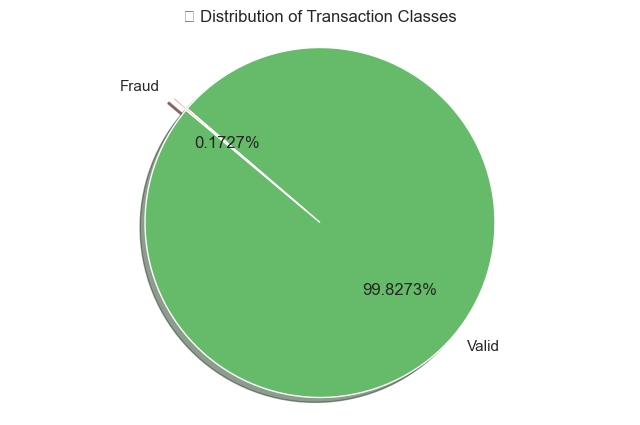

📌 Fraud Ratio: 0.001730
🔴 Fraud Cases: 492
🟢 Valid Transactions: 284315


In [36]:

# Step 4: Class Distribution Visualization
def plot_class_distribution(df):
    fraud_count = df["Class"].value_counts()
    labels = ["Valid", "Fraud"]
    colors = ["#66bb6a", "#ef5350"]
    
    plt.figure(figsize=(8, 5))
    plt.pie(fraud_count, labels=labels, colors=colors, autopct="%1.4f%%", startangle=140, explode=[0, 0.1], shadow=True)
    plt.title("💳 Distribution of Transaction Classes")
    plt.axis("equal")
    plt.show()

    fraud = df[df["Class"] == 1]
    valid = df[df["Class"] == 0]
    outlier_fraction = len(fraud) / float(len(valid))
    
    print(f"📌 Fraud Ratio: {outlier_fraction:.6f}")
    print(f"🔴 Fraud Cases: {len(fraud)}")
    print(f"🟢 Valid Transactions: {len(valid)}")
    
    return fraud, valid

fraud, valid = plot_class_distribution(data)

In [37]:
# Step 5: Explore Transaction Amounts
def compare_transaction_amounts(fraud, valid):
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    sns.boxplot(y=fraud["Amount"], ax=axs[0], color="#ef5350")
    axs[0].set_title("Fraudulent Transactions")
    axs[0].set_ylabel("Amount ($)")
    
    sns.boxplot(y=valid["Amount"], ax=axs[1], color="#66bb6a")
    axs[1].set_title("Valid Transactions")
    axs[1].set_ylabel("Amount ($)")
    
    plt.suptitle("💰 Comparison of Transaction Amounts")
    plt.tight_layout()
    plt.show()
    
    print("💡 Summary of Fraud Amounts:\n", fraud["Amount"].describe())



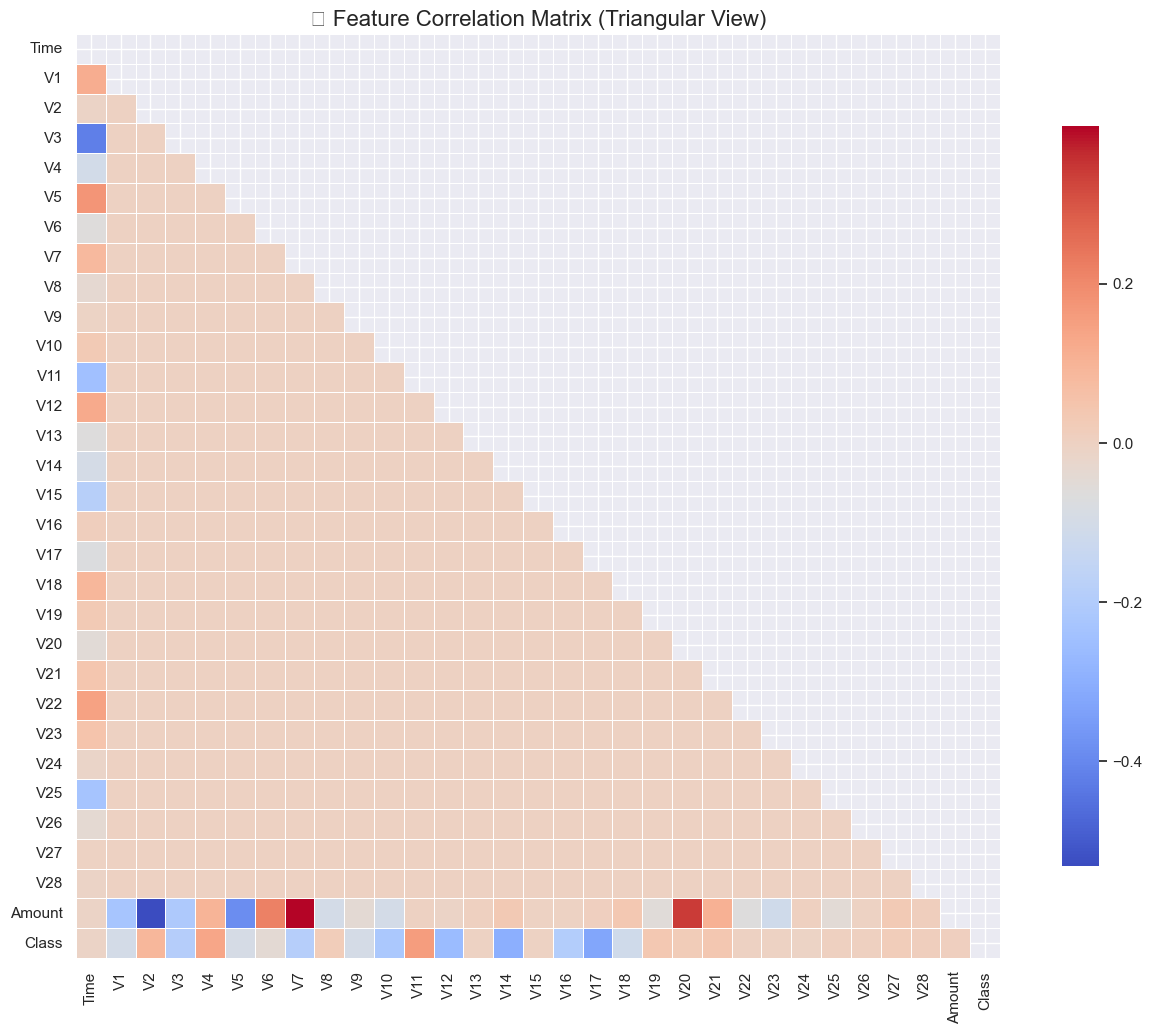

In [28]:
# Step 6: Correlation Matrix Heatmap
def plot_corr_matrix(df):
    corr = df.corr()
    plt.figure(figsize=(16, 12))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=False, fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title("📈 Feature Correlation Matrix (Triangular View)", fontsize=16)
    plt.show()

plot_corr_matrix(data)